# SVM using SGD

In [2]:
from SGD import *

sgd = SGD(learning_rate=0.05)
sgd.train(xtrain, ytrain, batch_size=10, epoch_count=20)

Epoch: 0. Total error: 7.049880970787065
Epoch: 1. Total error: 3.10260124716219
Epoch: 2. Total error: 2.43406126852308
Epoch: 3. Total error: 2.115432638522957
Epoch: 4. Total error: 1.039244470061191
Epoch: 5. Total error: 1.0528290098179502
Epoch: 6. Total error: 1.0158446318463281
Epoch: 7. Total error: 1.5083161826124678
Epoch: 8. Total error: 3.5064360236424377
Epoch: 9. Total error: 0.6871442836381345
Epoch: 10. Total error: 1.0666330569816733
Epoch: 11. Total error: 1.584456010147803
Epoch: 12. Total error: 1.0193125077170138
Epoch: 13. Total error: 1.7824202701226233
Epoch: 14. Total error: 1.4456244143990955
Epoch: 15. Total error: 1.1146396086211632
Epoch: 16. Total error: 1.5672736538721466
Epoch: 17. Total error: 2.295380012308468
Epoch: 18. Total error: 1.779366241274387
Epoch: 19. Total error: 1.8815356674568087


In [3]:
sgd.weight

array([ 0.11641274,  0.91723467, -1.20484223])

## First look at datasets

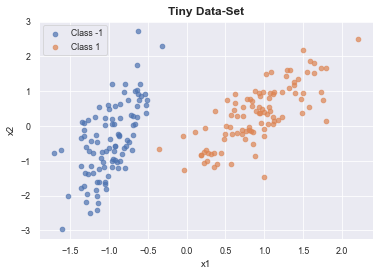

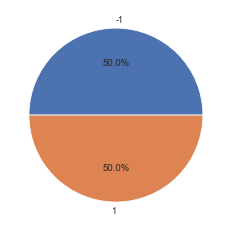

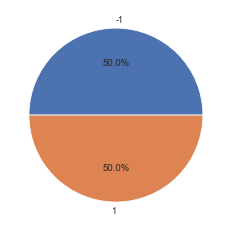

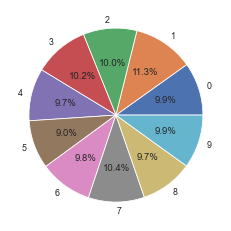

In [1]:
## Dataset tiny
import matplotlib.pyplot as plt 
from DataLoader import *
from LinearSVM import *
dataloader = DataLoader()

# Tiny 
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()

# Entire dataset
X = np.concatenate((xtrain, xtest))
Y = np.concatenate((ytrain, ytest))
plt.title("Tiny Data-Set", fontweight="bold", fontsize=12)
plt.scatter(X[Y==-1,0], X[Y==-1,1], label='Class -1', alpha=0.7)
plt.scatter(X[Y==1,0], X[Y==1,1], label='Class 1', alpha=0.7)
plt.xlabel("x1"); plt.ylabel("x2")
plt.legend()
plt.show()

counts = dict()
for x in np.unique(Y).astype(int):
    counts[x] = np.count_nonzero(Y == x)

plt.pie(x=counts.values(), labels=counts.keys(), autopct='%1.1f%%')
plt.show() # roughly balanced data set

# Large 
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_large()
Y = np.concatenate((ytrain, ytest))

counts = dict()
for x in np.unique(Y).astype(int):
    counts[x] = np.count_nonzero(Y == x)

plt.pie(x=counts.values(), labels=counts.keys(), autopct='%1.1f%%')
plt.show() # roughly balanced data set

# MNIST
xtrain, xtest, ytrain, ytest = dataloader.get_mnist()
Y = np.concatenate((ytrain, ytest))

counts = dict()
for x in np.unique(Y).astype(int):
    counts[x] = np.count_nonzero(Y == x)

plt.pie(x=counts.values(), labels=counts.keys(), autopct='%1.1f%%')
plt.show() # roughly balanced data set

## Hyperparameter Search -- Tiny

In [2]:
import matplotlib.pyplot as plt 
from DataLoader import *
from LinearSVM import *
from pprint import pprint
from CV import cross_validation_score

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()

lrs = [0.1, 0.5, 1, 3, 5]; Cs = [0.001, 0.01, 0.1, 0.5]
batch_sizes = [10, 20, 30, 40]

results = {}
for lr in tqdm(lrs):
    for C in Cs:
        for batch in batch_sizes:
            svm = LinearSVM(lr=lr, C=C, batch_size=batch)
            results[f'lr:{lr}, C:{C}, batch:{batch}'] = cross_validation_score(svm, xtrain, ytrain, k=5)
results = sorted(results.items(), key=lambda l:l[1], reverse=True)

print("\n\n Best parameters and their resulting classification accuracy:")
pprint(results[:5])

100%|██████████| 5/5 [00:30<00:00,  6.10s/it]

 Best parameters and their resulting classification accuracy:
[('lr:3, C:0.1, batch:10', 1.0),
 ('lr:0.1, C:0.001, batch:10', 0.9928571428571429),
 ('lr:0.1, C:0.01, batch:10', 0.9928571428571429),
 ('lr:0.1, C:0.1, batch:10', 0.9928571428571429),
 ('lr:0.5, C:0.001, batch:10', 0.9928571428571429)]



## Classification accuracy and convergence plot

Runtime: 0.08 s
Classification accuracy evaluated on test set: 100.0 %


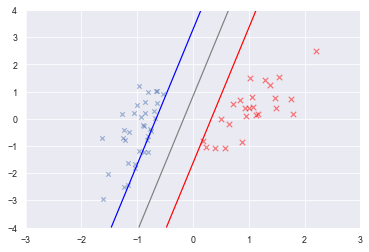

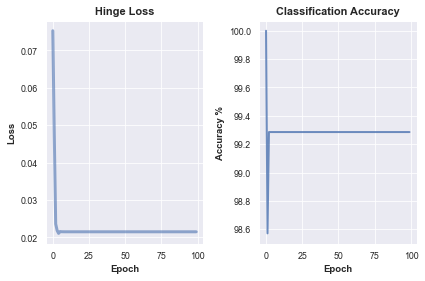

In [14]:
from DataLoader import *
from LinearSVM import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()

# best hyperparameters
lr = 3; C = 0.1; batch_size=10
svm = LinearSVM(lr=lr, C=C, batch_size=batch_size)
svm.fit(xtrain, ytrain)
print(f"Runtime: {round(svm.runtime, 2)} s")

# classification accuracy
print("Classification accuracy evaluated on test set:", end=" ")
print(round(svm.accuracy(np.c_[xtest, np.ones(xtest.shape[0])], ytest), 2)*100, "%")
svm.plot_margin(np.c_[xtest, np.ones(xtest.shape[0])], ytest)

# Convergence Plots
plt.subplot(1,2,1)
plt.title("Hinge Loss", fontweight="bold", fontsize=11)
plt.plot(svm.losses, lw=3, alpha=0.6)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Loss", fontweight="bold")

plt.subplot(1,2,2)
plt.title("Classification Accuracy", fontweight="bold", fontsize=11)
plt.plot(svm.accuracies * 100, lw=2, alpha=0.8)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Accuracy %", fontweight="bold")
#plt.ylim(min(svm.accuracies), 105)

plt.tight_layout()
plt.show()

## Hyperparameter Search -- Large

In [4]:
import matplotlib.pyplot as plt 
from DataLoader import *
from LinearSVM import *
from pprint import pprint
from CV import cross_validation_score

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_large()

lrs = [0.1, 0.5, 1, 3, 5]; Cs = [0.001, 0.01, 0.1]
batch_sizes = [50, 100, 200]
results = {}

for lr in tqdm(lrs):
    for C in Cs:
        for batch in batch_sizes:
            svm = LinearSVM(lr=lr, C=C, batch_size=batch, max_iters=3)
            results[f'lr:{lr}, C:{C}, batch:{batch}'] = cross_validation_score(svm, xtrain, ytrain, k=5)
results = sorted(results.items(), key=lambda l:l[1], reverse=True)

print("\n\n Best parameters and their resulting classification accuracy:")
pprint(results[:5])

100%|██████████| 5/5 [05:58<00:00, 71.78s/it]

 Best parameters and their resulting classification accuracy:
[('lr:0.1, C:0.001, batch:50', 1.0),
 ('lr:0.1, C:0.001, batch:100', 1.0),
 ('lr:0.1, C:0.001, batch:200', 1.0),
 ('lr:0.1, C:0.01, batch:50', 1.0),
 ('lr:0.1, C:0.01, batch:100', 1.0)]



## Classification accuracy and convergence plot

Runtime: 6.41 s
Classification accuracy evaluated on test set: 100 %


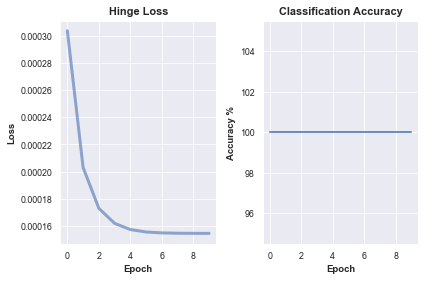

In [20]:
from DataLoader import *
from LinearSVM import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_large()

# best hyperparameters
lr = 0.1; C = 0.001; batch_size=200
svm = LinearSVM(lr=lr, C=C, batch_size=batch_size, max_iters=10)
svm.fit(xtrain, ytrain)
print(f"Runtime: {round(svm.runtime, 2)} s")

# classification accuracy
print("Classification accuracy evaluated on test set:", end=" ")
print(round(svm.accuracy(np.c_[xtest, np.ones(xtest.shape[0])], ytest))*100, "%")

# Convergence Plots
plt.subplot(1,2,1)
plt.title("Hinge Loss", fontweight="bold", fontsize=11)
plt.plot(svm.losses, lw=3, alpha=0.6)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Loss", fontweight="bold")

plt.subplot(1,2,2)
plt.title("Classification Accuracy", fontweight="bold", fontsize=11)
plt.plot(svm.accuracies * 100, lw=2, alpha=0.8)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Accuracy %", fontweight="bold")

plt.tight_layout()
plt.show()

## Hyperparameter Search -- MNIST

In [17]:
from MultiClassSVM import *
import matplotlib.pyplot as plt 
from DataLoader import *
from pprint import pprint 

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_mnist()

# split 10.000 samples off xtrain and do hyperparameter-search using this validation set
indices = np.random.permutation(len(ytrain))
xtrain = xtrain[indices]
ytrain = ytrain[indices]

x_val = xtrain[:10**4]; y_val = ytrain[:10**4]
xtrain = xtrain[10**4:]; ytrain = ytrain[10**4:]

lrs = [0.01, 0.1, 0.5, 1, 3]; Cs = [0.001, 0.01, 0.1]
batch_sizes = [100, 200, 300]

results = {}
for lr in tqdm(lrs):
    for C in Cs:
        for batch in batch_sizes:
            mc_svm = MultiClassSVM(lr=lr, C=C, batch_size=batch, max_iters=1)
            mc_svm.fit(xtrain, ytrain)
            results[f'lr:{lr}, C:{C}, batch:{batch}'] = mc_svm.accuracy(np.c_[x_val, np.ones(x_val.shape[0])], y_val)
results = sorted(results.items(), key=lambda l:l[1], reverse=True)

print("\n\n Best parameters and their resulting classification accuracy:")
pprint(results[:5])

100%|██████████| 4/4 [25:35<00:00, 383.88s/it]

 Best parameters and their resulting classification accuracy:
[('lr:0.1, C:0.01, batch:200', 0.9146),
 ('lr:0.1, C:0.1, batch:200', 0.9126),
 ('lr:0.1, C:0.001, batch:200', 0.9114),
 ('lr:0.1, C:0.01, batch:300', 0.9112),
 ('lr:0.1, C:0.1, batch:300', 0.911)]



## Classification accuracy and convergence plot

100%|██████████| 4/4 [03:30<00:00, 52.62s/it]
Runtime: 210.48 s
Classification accuracy evaluated on test set: 92.78999999999999 %


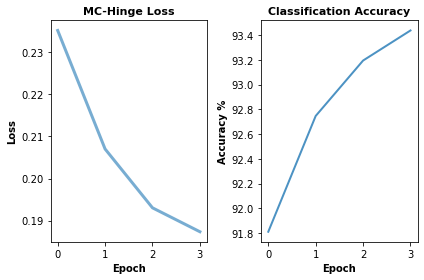

In [18]:
from MultiClassSVM import *
import matplotlib.pyplot as plt 
from DataLoader import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_mnist()

# best hyperparameters
lr = 0.1; C = 0.01; batch_size=200
mc_svm = MultiClassSVM(lr=lr, C=C, batch_size=batch_size, max_iters=4, tqdm_toggle=True)
mc_svm.fit(xtrain, ytrain)
print(f"Runtime: {round(mc_svm.runtime, 2)} s")

# classification accuracy
print("Classification accuracy evaluated on test set:", end=" ")
print(round(mc_svm.accuracy(np.c_[xtest, np.ones(xtest.shape[0])], ytest), 2)*100, "%")

# Convergence Plots
plt.subplot(1,2,1)
plt.title("MC-Hinge Loss", fontweight="bold", fontsize=11)
plt.plot(mc_svm.losses, lw=3, alpha=0.6)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Loss", fontweight="bold")

plt.subplot(1,2,2)
plt.title("Classification Accuracy", fontweight="bold", fontsize=11)
plt.plot(mc_svm.accuracies * 100, lw=2, alpha=0.8)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Accuracy %", fontweight="bold")

plt.tight_layout()
plt.show()